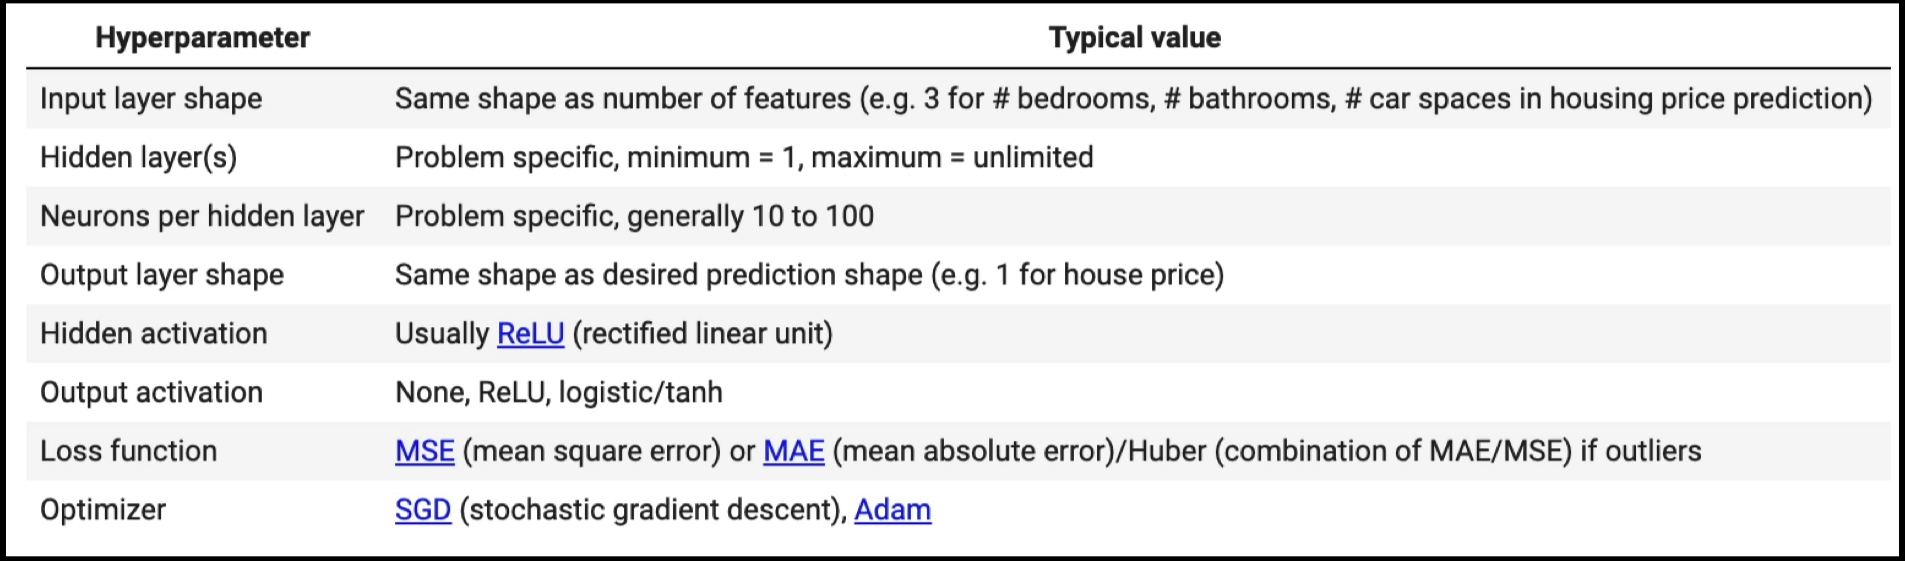

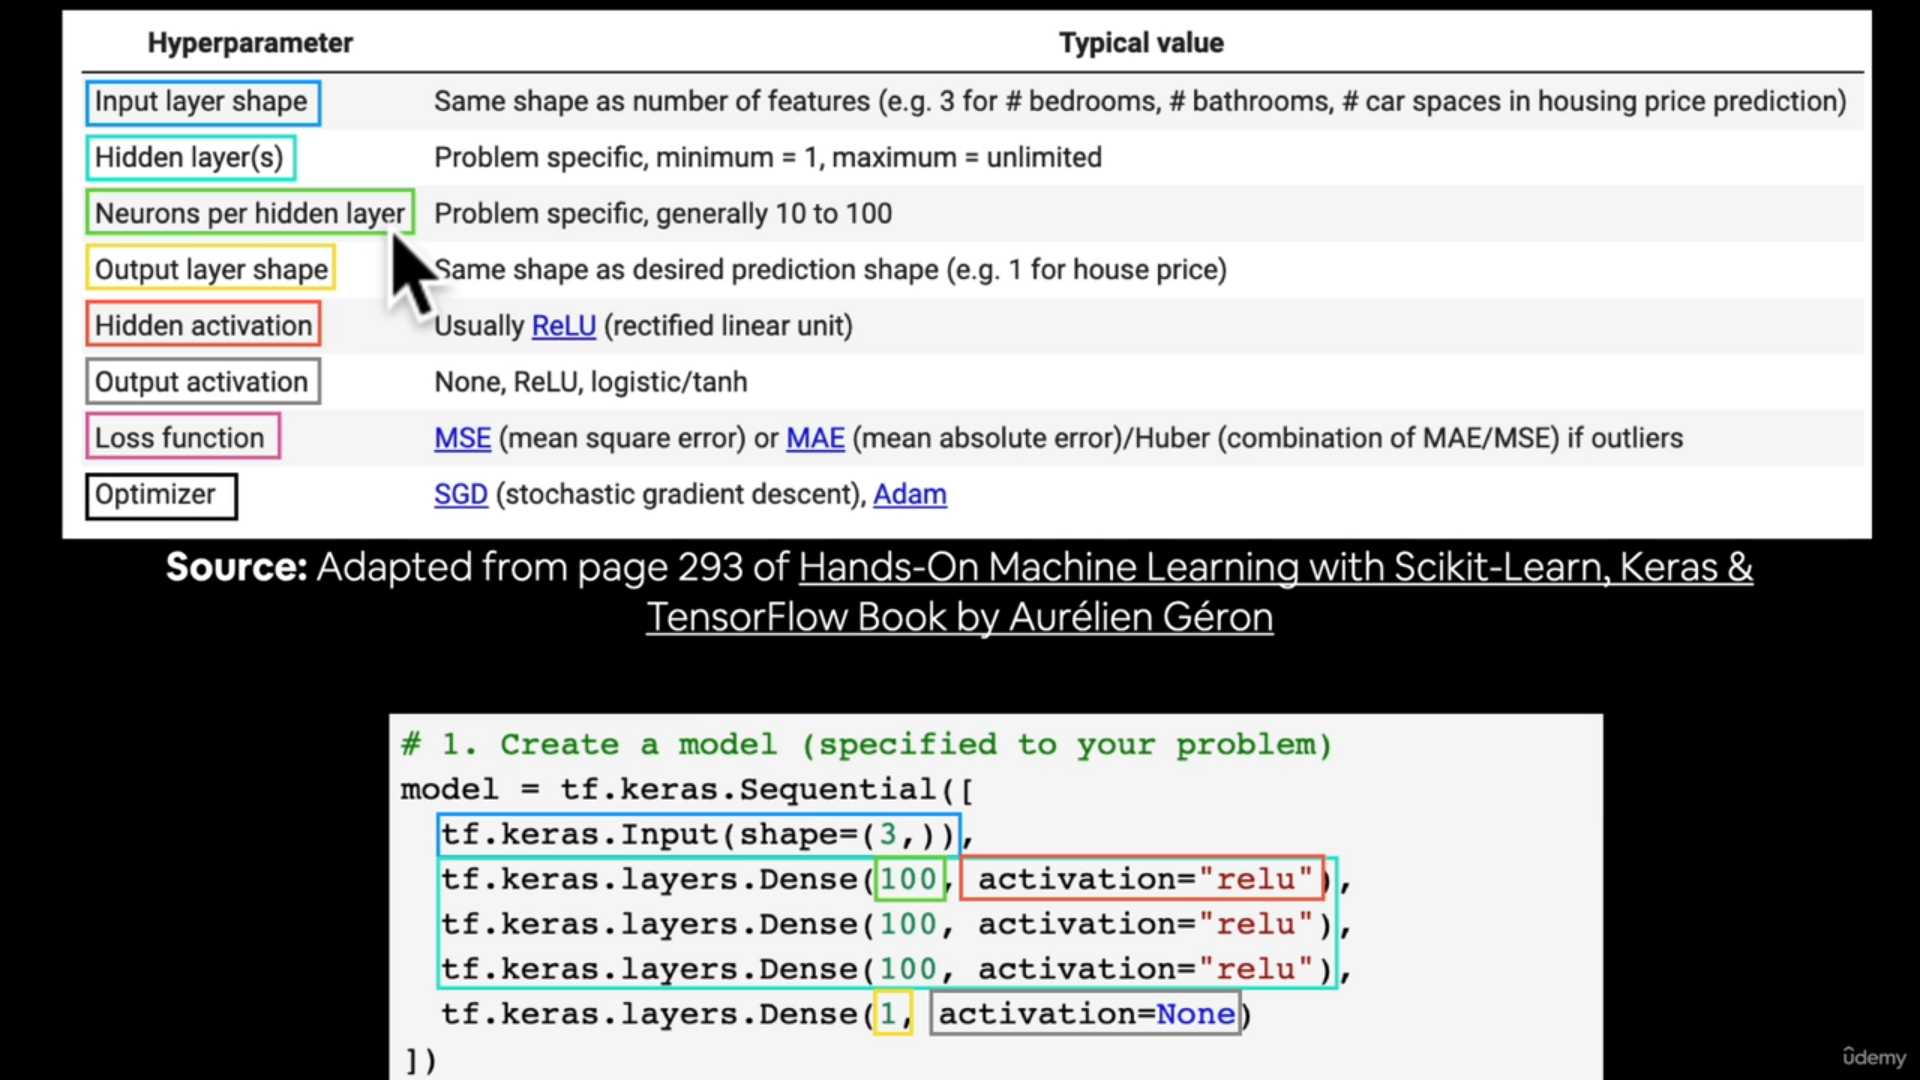

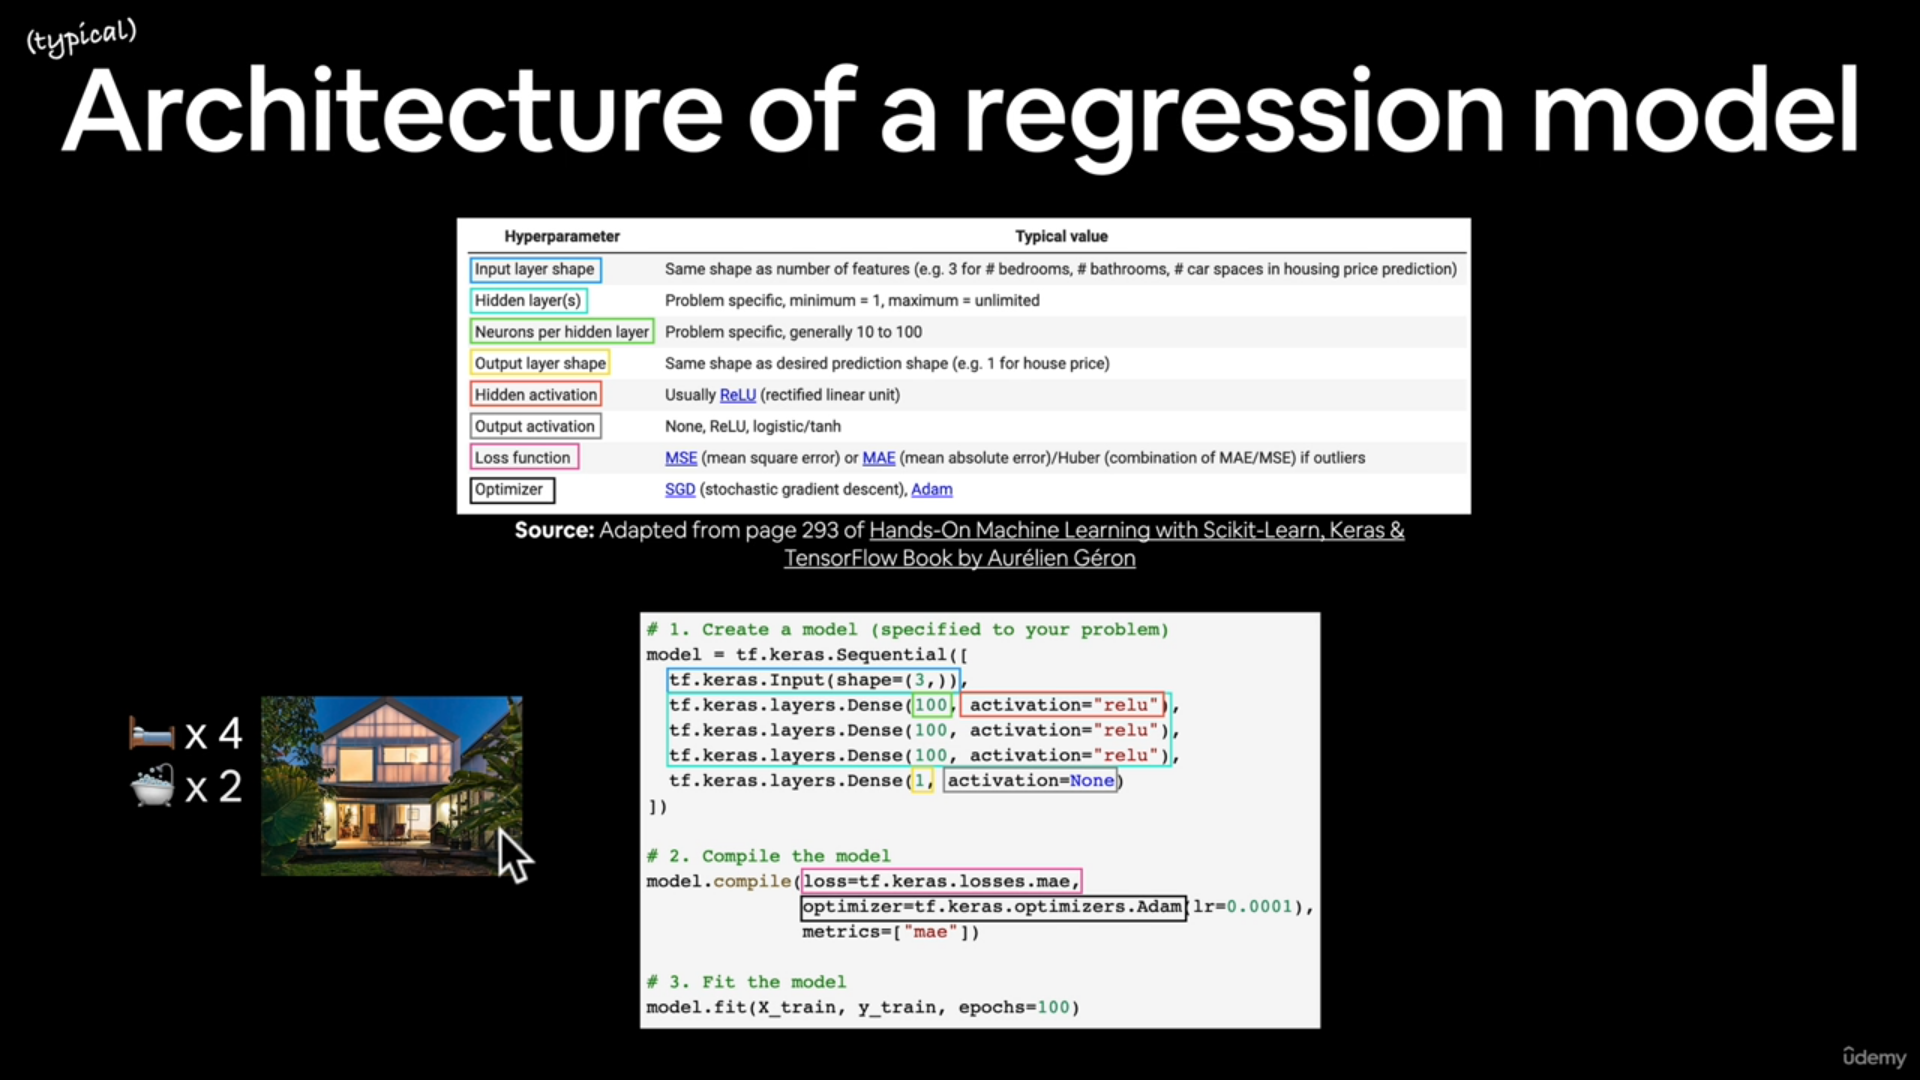

# Introduction to Regression with Neural Networks in TensorFlow

 There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


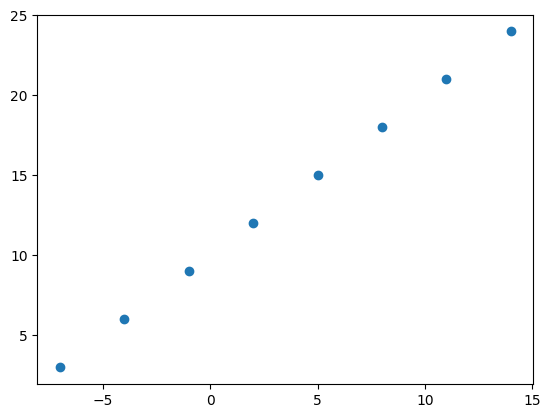

In [2]:
## Creating data to view and fit

import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [6]:
input_shape = X.shape
ouput_shape = y.shape
input_shape, ouput_shape

((8,), (8,))

In [7]:
X[0].ndim

0

In [8]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [9]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,

(TensorShape([]),)

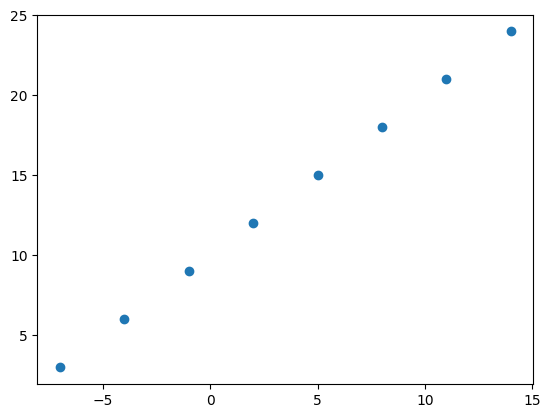

In [11]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

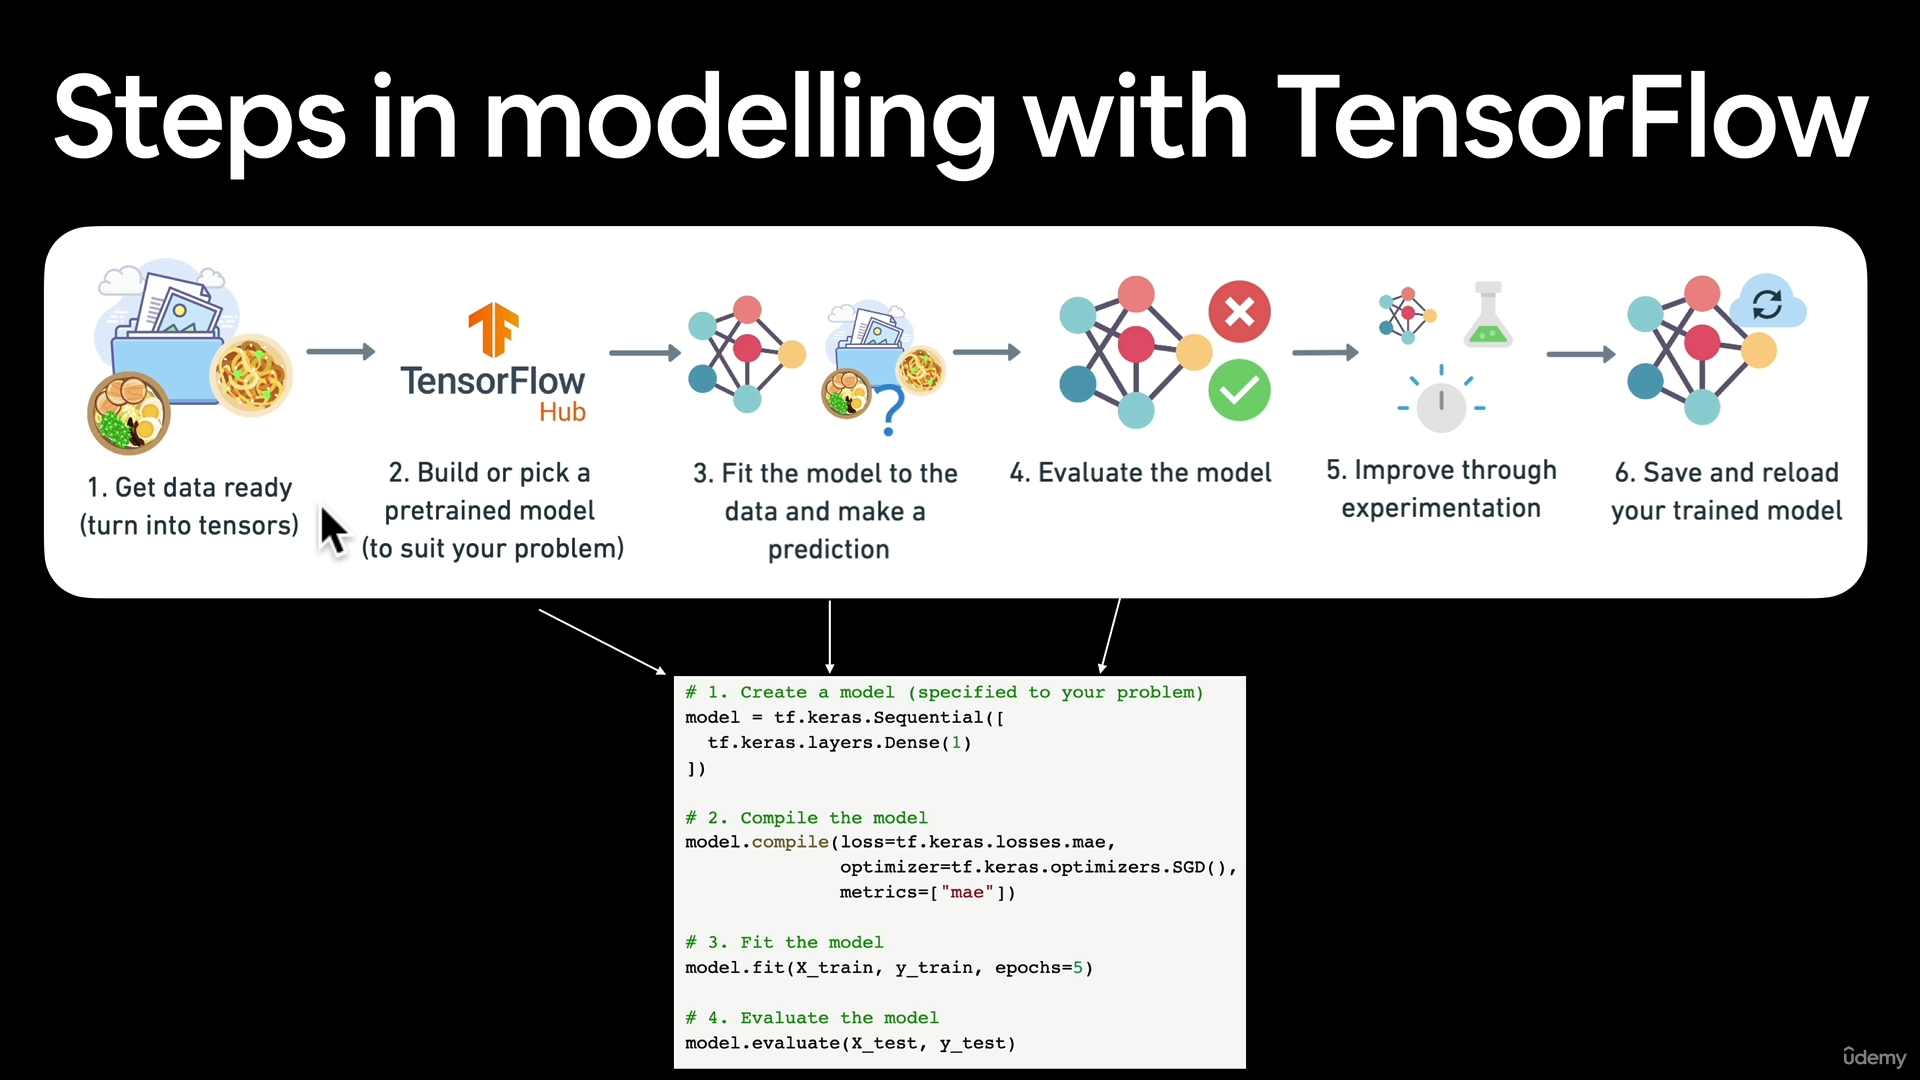

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step - loss: 19.8887 - mae: 19.8887
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 19.6075 - mae: 19.6075
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 19.3262 - mae: 19.3262
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 19.0450 - mae: 19.0450
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 18.7637 - mae: 18.7637


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# Try and make a prediction using our model
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


array([[-18.615854]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activataion functions of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [15]:
# Let's rebuild our model

# 1. Create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step - loss: 18.1069 - mae: 18.1069
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 17.8256 - mae: 17.8256
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 17.5444 - mae: 17.5444
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 17.2631 - mae: 17.2631
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 16.9819 - mae: 16.9819
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 16.7006 - mae: 16.7006
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 16.4194 - mae: 16.4194
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 16.1381 - mae: 16.1381
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 15.8569 - mae: 15.8569
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 15.5756 - mae: 15.5756
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 15.2944 - mae: 15.2944
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - loss: 15.0131 - mae: 15.0131
Epoch 13/100
1/1 ━

In [16]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# Let's see if our model's prediction has improved
model1.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


array([[29.366446]], dtype=float32)

In [18]:
# 1. Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 13.7819 - mae: 13.7819
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 13.3461 - mae: 13.3461
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 12.9120 - mae: 12.9120
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 12.4701 - mae: 12.4701
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - loss: 12.0103 - mae: 12.0103
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 11.5224 - mae: 11.5224
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 10.9948 - mae: 10.9948
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 10.4145 - mae: 10.4145
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 9.7663 - mae: 9.7663
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 9.0321 - mae: 9.0321
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 8.1899 - mae: 8.1899
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 7.2124 - mae: 7.2124
Epoch 13/100
1/1 ━━━━━━━━

In [19]:
model2.predict(np.array([17.]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


array([[30.208214]], dtype=float32)

In [20]:
# 1. Create the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model3.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 20.3413 - mae: 20.3413
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 20.2813 - mae: 20.2813
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 20.2213 - mae: 20.2213
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 20.1613 - mae: 20.1613
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 20.1013 - mae: 20.1013
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 20.0413 - mae: 20.0413
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 19.9813 - mae: 19.9813
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 19.9213 - mae: 19.9213
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 19.8613 - mae: 19.8613
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 19.8013 - mae: 19.8013
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 19.7413 - mae: 19.7413
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 19.6813 - mae: 19.6813
Epoch 13/100
1/1 ━━━━━━━

In [21]:
model3.predict(np.array([17.]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


array([[-6.5815997]], dtype=float32)

In [22]:
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.4006 - mae: 12.4006   
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 11.7924 - mae: 11.7924
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 11.1746 - mae: 11.1746
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 10.5411 - mae: 10.5411
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - loss: 9.8856 - mae: 9.8856
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 9.2078 - mae: 9.2078
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step - loss: 8.5363 - mae: 8.5363
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 7.8362 - mae: 7.8362
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 7.0976 - mae: 7.0976
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 6.3049 - mae: 6.3049
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 5.4503 - mae: 5.4503
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - loss: 4.5256 - mae: 4.5256
Epoch 13/100
1/1 ━━━━━━━━━━━━

In [23]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [24]:
# Let's try to make a prediction
model.predict(np.array([17.]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[32.69101]], dtype=float32)

In [25]:
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - loss: 14.0518 - mae: 14.0518
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 13.5081 - mae: 13.5081
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.9694 - mae: 12.9694
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.4305 - mae: 12.4305
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.8902 - mae: 11.8902
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 11.3391 - mae: 11.3391
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.7699 - mae: 10.7699
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.1804 - mae: 10.1804
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.5660 - mae: 9.5660
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 8.9216 - mae: 8.9216
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.2383 - mae: 8.2383
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.5522 - mae: 7.5522
Epoch 13/100
1/1 ━━━━━━━━━━━━━━

In [26]:
model.predict(np.array([17.]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[32.86489]], dtype=float32)

In [27]:
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step - loss: 14.5714 - mae: 14.5714
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 14.0236 - mae: 14.0236
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.4800 - mae: 13.4800
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.9378 - mae: 12.9378
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.3943 - mae: 12.3943
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 11.8465 - mae: 11.8465
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.2916 - mae: 11.2916
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.7268 - mae: 10.7268
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 10.1491 - mae: 10.1491
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.5556 - mae: 9.5556
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.9433 - mae: 8.9433
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.3089 - mae: 8.3089
Epoch 13/100
1/1 ━━━━━━━━━━━━━

In [28]:
model.predict(np.array([17.]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[30.52362]], dtype=float32)

In [29]:
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step - loss: 13.8506 - mae: 13.8506
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.7801 - mae: 13.7801
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 13.7097 - mae: 13.7097
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.6394 - mae: 13.6394
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.5691 - mae: 13.5691
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 13.4988 - mae: 13.4988
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.4286 - mae: 13.4286
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.3585 - mae: 13.3585
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 13.2884 - mae: 13.2884
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 13.2183 - mae: 13.2183
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 13.1483 - mae: 13.1483
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.0783 - mae: 13.0783
Epoch 13/100
1/1 ━━━━━━━

In [30]:
model.predict(np.array([17.]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[30.891344]], dtype=float32)

In [31]:
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step - loss: 12.6552 - mae: 12.6552
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 11.9601 - mae: 11.9601
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.2597 - mae: 11.2597
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 10.5532 - mae: 10.5532
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.8377 - mae: 9.8377
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 9.1096 - mae: 9.1096
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 8.3658 - mae: 8.3658
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 7.6036 - mae: 7.6036
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 6.8864 - mae: 6.8864
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 6.8646 - mae: 6.8646
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 7.1409 - mae: 7.1409
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 7.2966 - mae: 7.2966
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [32]:
model.predict(np.array([17.]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[27.25813]], dtype=float32)

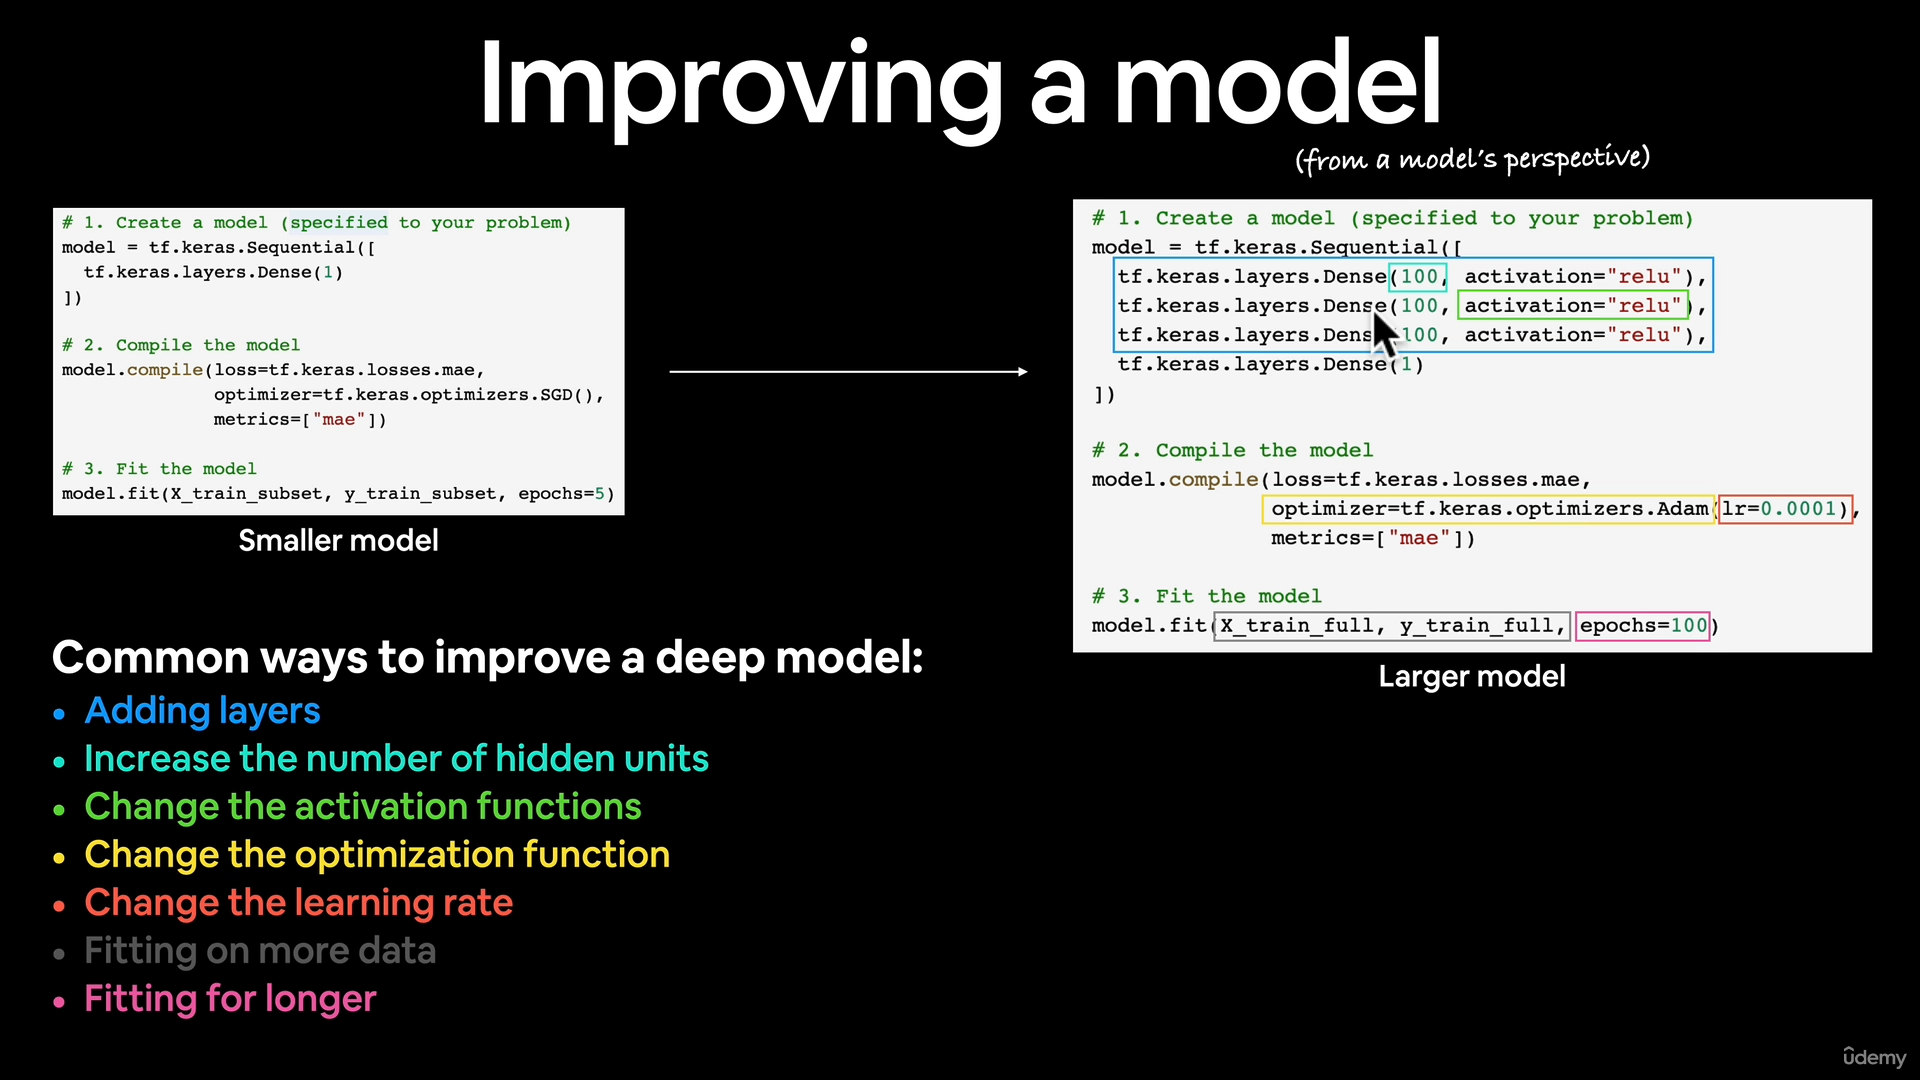

## Evaluating a model

In practice, a typical workflow we'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```



When it comes to evaluation... there are 3 words we should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [33]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [34]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

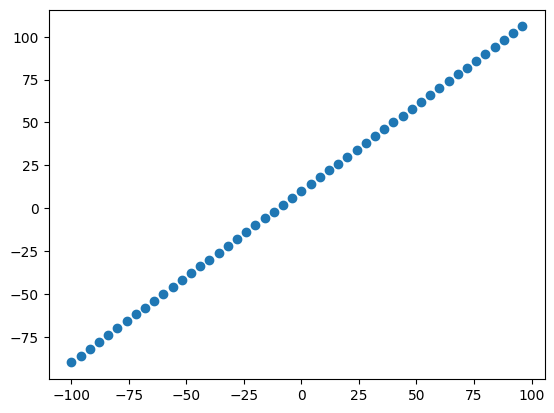

In [35]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* Training set - the model learns from this data, which typically 70-80% of the total data we have available.
* Validation set - the model gets tuned on this data, which typically 115% of the data available.
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.


In [36]:
# Check the length of how many samples we have
len(X)

50

In [37]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

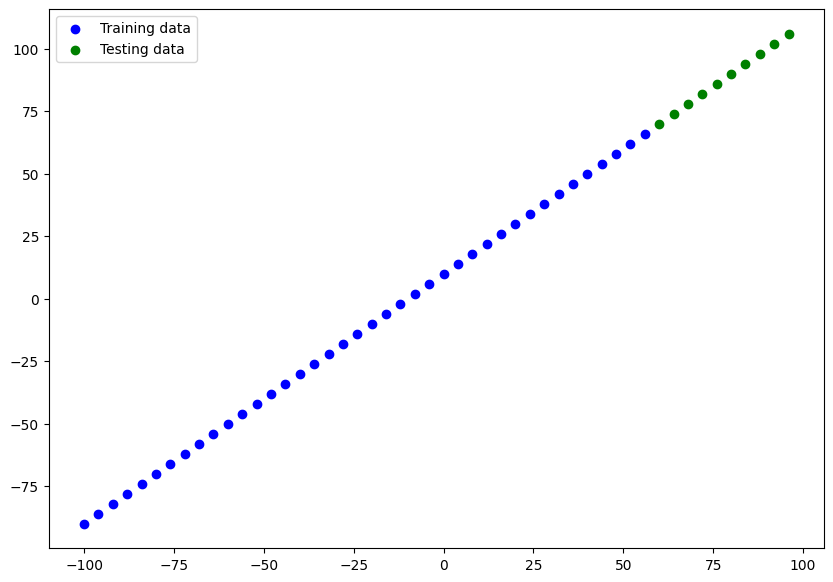

In [38]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend()

In [39]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


### Visualizing the model

In [40]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Let's create a model which builds automatically by defining the input_shape argument in the first layer

In [41]:
# Let's have a look at how to build a neural network for our data
tf.random.set_seed(42)
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable parameters -  these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when we bring in already learned patterns or parameters from other models during **transfer learaning**).

In [43]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [44]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

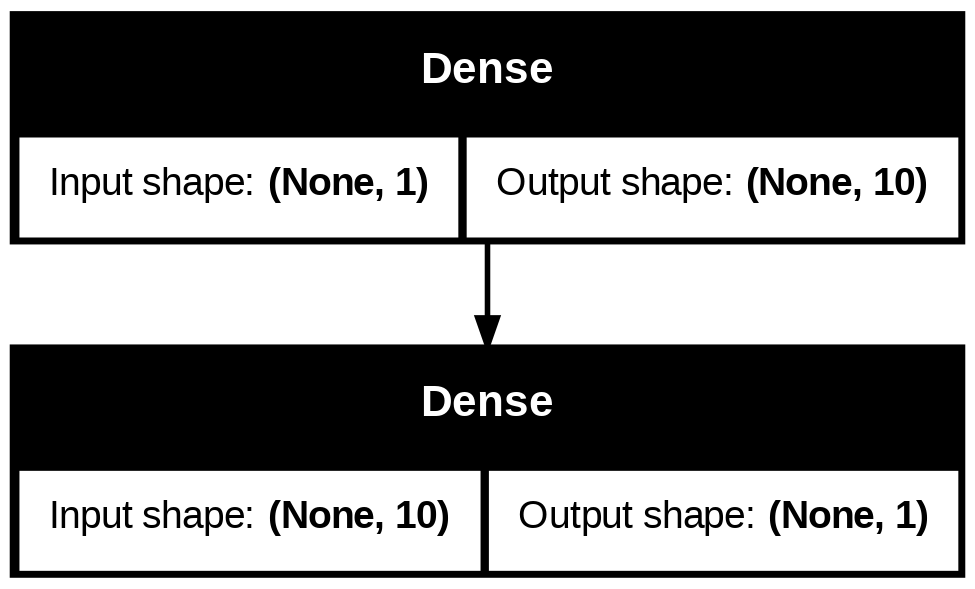

In [45]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often we'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus our model's predictions).

In [46]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[37.084206],
       [39.424126],
       [41.764046],
       [44.103966],
       [46.443886],
       [48.783806],
       [51.123726],
       [53.463646],
       [55.80357 ],
       [58.143486]], dtype=float32)

In [47]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [48]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend()

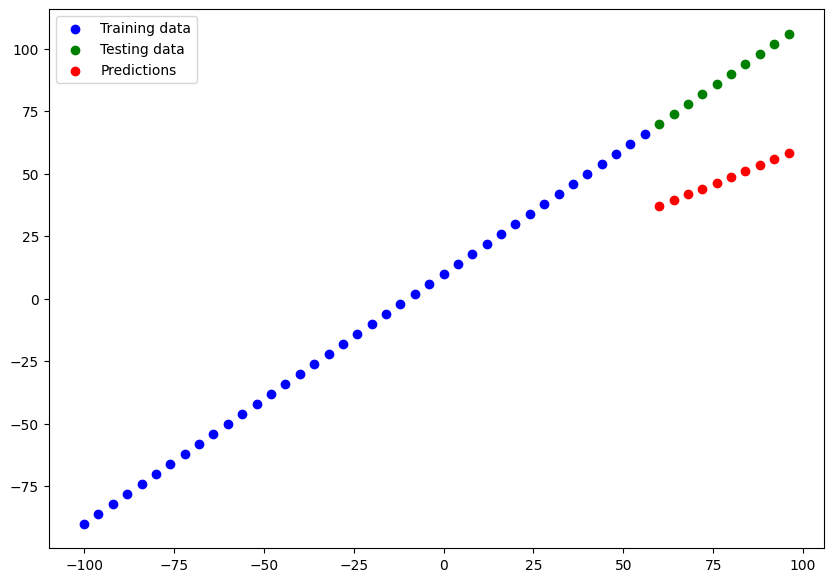

In [49]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem we're working on, there will be different evaluation metrics to evaluate our model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"


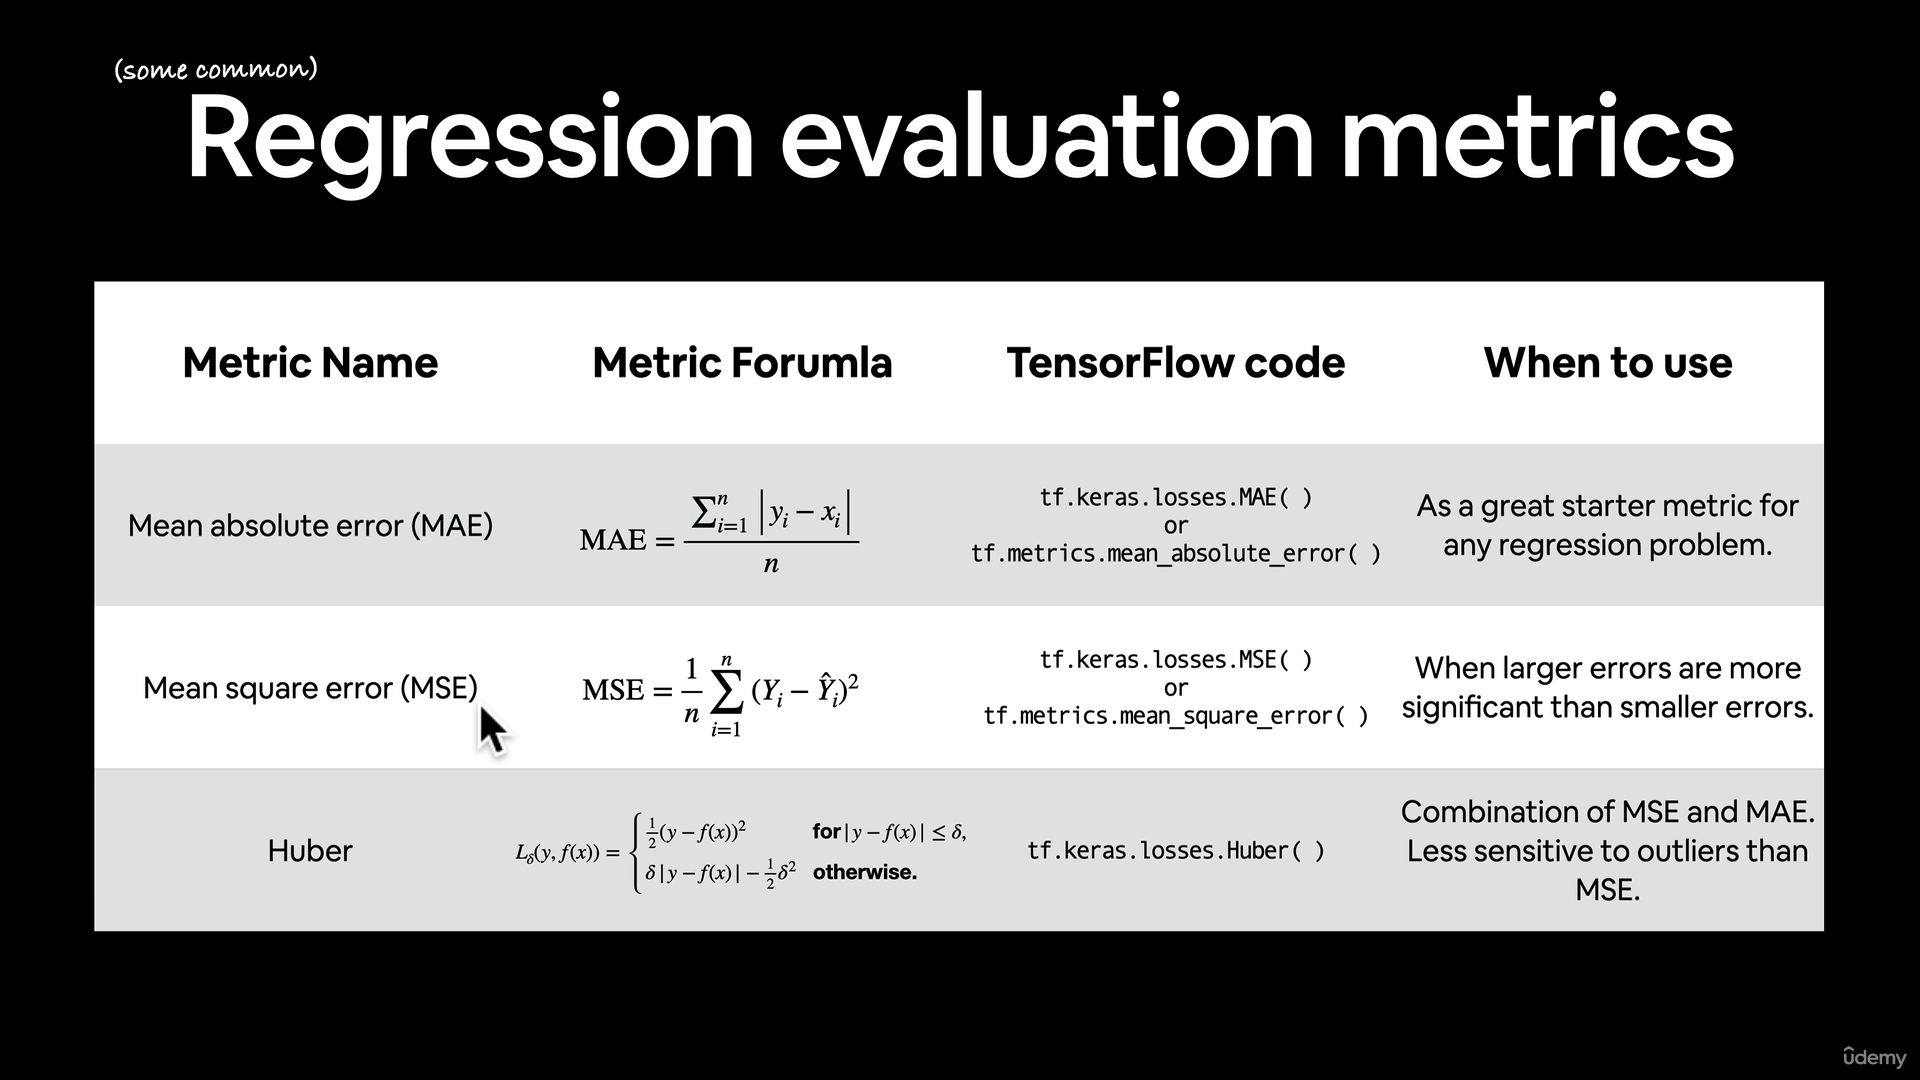

In [50]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 40.3862 - mae: 40.3862


[40.38615417480469, 40.38615417480469]

In [51]:
y_pred

array([[37.084206],
       [39.424126],
       [41.764046],
       [44.103966],
       [46.443886],
       [48.783806],
       [51.123726],
       [53.463646],
       [55.80357 ],
       [58.143486]], dtype=float32)

In [52]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [53]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([32.915794, 34.575874, 36.235954, 37.896034, 39.556114, 41.216194,
       42.876274, 44.536354, 46.19643 , 47.856514], dtype=float32)>

In [54]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[37.084206],
       [39.424126],
       [41.764046],
       [44.103966],
       [46.443886],
       [48.783806],
       [51.123726],
       [53.463646],
       [55.80357 ],
       [58.143486]], dtype=float32)>

In [55]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [56]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([37.084206, 39.424126, 41.764046, 44.103966, 46.443886, 48.783806,
       51.123726, 53.463646, 55.80357 , 58.143486], dtype=float32)>

In [57]:
# Calculate the mean absolute error
mae = tf.losses.mae(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=40.38615417480469>

In [58]:
# Calculate the mean square error
mse = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1653.77734375>

In [59]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.losses.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.losses.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model
1. Get more data - get more examples for our model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make our model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give our model more of a chance to find patterns in the data.


In [60]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for our model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make our model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give our model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

`Build model_1`

In [61]:
# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss="mae", optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 23.6327 - mae: 23.6327 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.0164 - mae: 8.0164
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.6657 - mae: 9.6657 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.9985 - mae: 7.9985
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.6541 - mae: 9.6541
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.9807 - mae: 7.9807
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.6424 - mae: 9.6424 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.9628 - mae: 7.9628
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.6308 - mae: 9.6308 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.9450 - mae: 7.9450
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.6192 - mae: 9.6192
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.9271 - mae: 7.9271
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


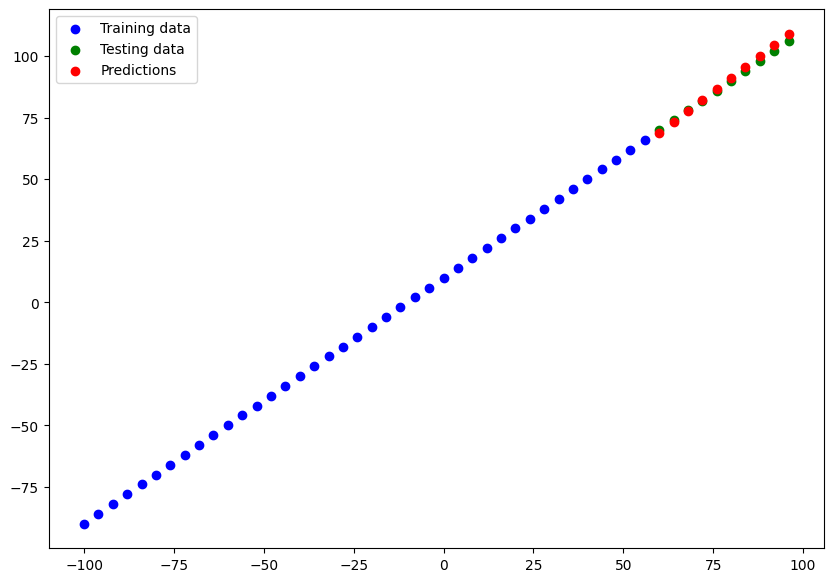

In [62]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [63]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.3928306102752686>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.8124895095825195>)

In [64]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss="mae", optimizer=tf.keras.optimizers.SGD(), metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 76.4956 - mse: 8399.0186 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 16.4240 - mse: 397.2429
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.7728 - mse: 196.5844
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.4529 - mse: 342.0330
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.0249 - mse: 165.4641
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13.3348 - mse: 231.0837
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 16.1396 - mse: 375.8072
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.6748 - mse: 127.5018
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.7498 - mse: 155.6175
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.8668 - mse: 208.6700
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.0080 - mse: 319.2208
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.2776 - mse: 119.8235
Epoch 13/10

In [65]:
y_preds_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


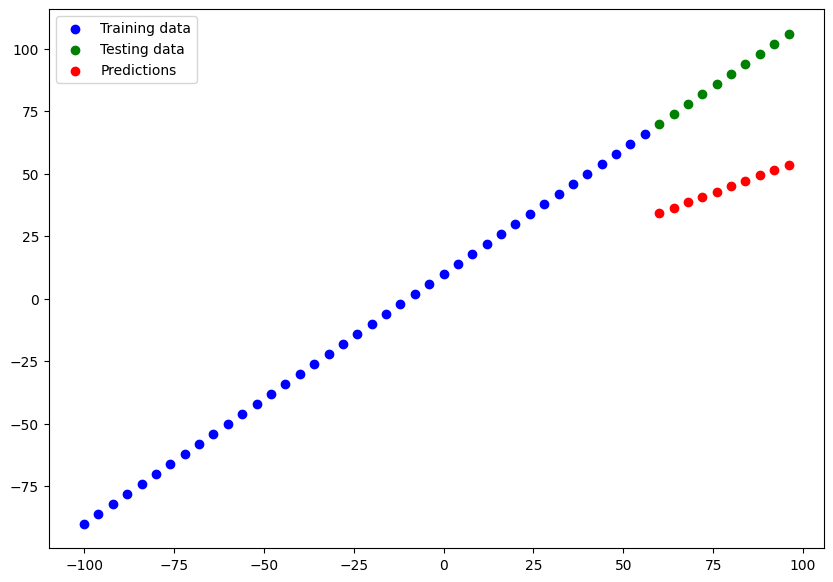

In [66]:
plot_predictions(predictions=y_preds_2)

In [67]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=44.03392791748047>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1967.029541015625>)

In [68]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_3.compile(loss="mae", optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 13.5786 - mae: 13.5786 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 24.7552 - mae: 24.7552
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.0930 - mae: 10.0930
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13.4809 - mae: 13.4809
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 17.1679 - mae: 17.1679
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 9.7555 - mae: 9.7555
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.9329 - mae: 10.9329
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.1072 - mae: 12.1072
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13.3028 - mae: 13.3028
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 16.0268 - mae: 16.0268
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.3579 - mae: 9.3579
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.3288 - mae: 10.3288
Epoch 13/500
2/2 ━━━━━━━━━━━

In [69]:
# Make and plot some predictions
y_predictions_3 = model_3.predict(X_test)
mae_3 = mae(y_test, y_predictions_3)
mse_3 = mse(y_test, y_predictions_3)

mae_3, mse_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=45.31033706665039>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2090.454345703125>)

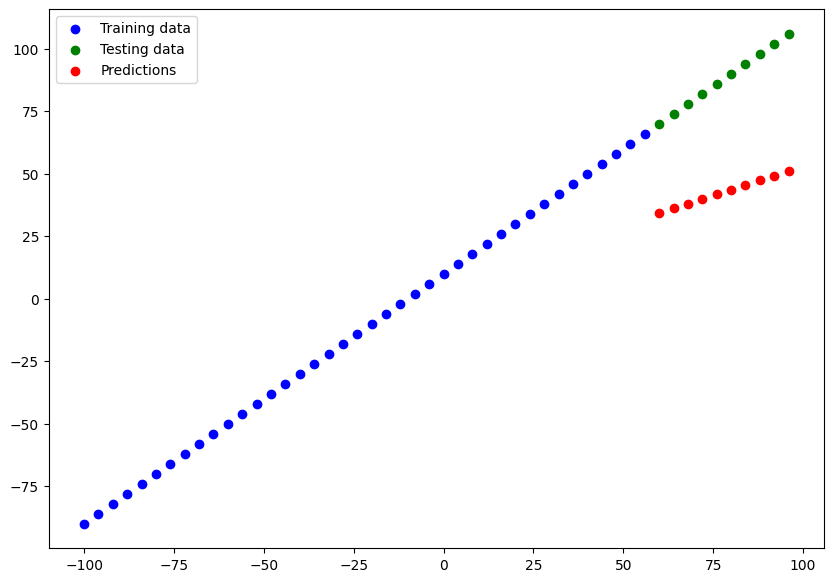

In [70]:
# Make and plot some predictions
plot_predictions(predictions=y_predictions_3)

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [71]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

model        mae          mse
0  model_1   1.392831     2.812490
1  model_2  44.033928  1967.029541
2  model_3  45.310337  2090.454346

## Tracking our experiments

One really good habit in machine leraning modelling is to track the results of our experiments.

And when doing so, it can be tedious if we're running lots of experiments.

Luckily, there are tools to help us!

* TensorBoard  - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format



In [72]:
# Save model using the SavedModel format
model_2.save("worst_model_SavedModel_format.keras")

## Loading in a saved model

In [73]:
# Load in the model
new_model = tf.keras.models.load_model("/content/worst_model_SavedModel_format.keras")
new_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [74]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_predictions = model_2.predict(X_test)
new_model_predictions = new_model.predict(X_test)
model_2_predictions == new_model_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [75]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [77]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [78]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=np.int32)
insurance_one_hot

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0              1                 0                 0                 0   
1              0                 0                 0                 1   
2              0                 0                 0                 1   
3              0                 0                 1                 0   
4              0                 0                 1                 0   
...          ...               ...               ...               ...   
1333           0                 0                 1                 0   
1334           0                 1                 0                 0   
1335           0                 0                 0                 1   
1336           0                 0                 0                 0   
1337           1                 0                 1                 0   

      region_southwest  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1333                 0  
1334                 0  
1335                 0  
1336                 1  
1337                 0  

[1338 rows x 12 columns]

In [79]:
 # Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot_dropped = pd.get_dummies(insurance, dtype=np.int32, drop_first=True)
insurance_one_hot_dropped

age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400         0           1   
1      18  33.770         1   1725.55230         1           0   
2      28  33.000         3   4449.46200         1           0   
3      33  22.705         0  21984.47061         1           0   
4      32  28.880         0   3866.85520         1           0   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830         1           0   
1334   18  31.920         0   2205.98080         0           0   
1335   18  36.850         0   1629.83350         0           0   
1336   21  25.800         0   2007.94500         0           0   
1337   61  29.070         0  29141.36030         0           1   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0                 1                 0  
3                    1                 0                 0  
4                    1                 0                 0  
...                ...               ...               ...  
1333                 1                 0                 0  
1334                 0                 0                 0  
1335                 0                 1                 0  
1336                 0                 0                 1  
1337                 1                 0                 0  

[1338 rows x 9 columns]

In [80]:
# Create X & y values (features and labels)
# Create training and test sets
# Build a nueral network (sort of like model_2 above)

from sklearn.model_selection import train_test_split

# Create X & y values
X = insurance_one_hot.drop(["charges"], axis=1)
y = insurance_one_hot["charges"]

# Split the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Build the neural network


# 1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
 ])

# 2. Compile the model
insurance_model.compile(loss="mae",
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10050.0996 - mae: 10050.0996   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7595.7637 - mae: 7595.7637 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7961.0005 - mae: 7961.0005 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7849.7183 - mae: 7849.7183 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7543.4131 - mae: 7543.4131 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7413.7808 - mae: 7413.7808
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7588.7256 - mae: 7588.7256 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7683.1045 - mae: 7683.1045 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7475.8550 - mae: 7475.8550 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7287.0181 - mae: 7287.0181 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7534.2109 - mae: 7534.2109 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━

In [81]:
 # Check the results of the insurance model on the test data
 insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8180.1035 - mae: 8180.1035  


[8155.08935546875, 8155.08935546875]

Right now it looks like our model isn't performing too well... Let's try and improve it

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3.

In [82]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss="mae",
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13250.6377 - mae: 13250.6377
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13103.5361 - mae: 13103.5361
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12797.3105 - mae: 12797.3105
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12189.8184 - mae: 12189.8184
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11140.9492 - mae: 11140.9492
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9719.1826 - mae: 9719.1826
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8308.9727 - mae: 8308.9727
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7508.1021 - mae: 7508.1021
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7371.8135 - mae: 7371.8135
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7344.8237 - mae: 7344.8237
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7324.0811 - mae: 7324.0811
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [83]:
# Evaulate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5031.8984 - mae: 5031.8984  


[4883.251953125, 4883.251953125]

In [84]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss="mae",
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13273.2266 - mae: 13273.2266
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13128.8281 - mae: 13128.8281
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12834.1982 - mae: 12834.1982
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12244.2715 - mae: 12244.2715
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11211.4424 - mae: 11211.4424
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9787.8652 - mae: 9787.8652
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8360.2920 - mae: 8360.2920
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7537.4844 - mae: 7537.4844
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7395.5415 - mae: 7395.5415
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7367.2446 - mae: 7367.2446
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7345.5923 - mae: 7345.5923
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [85]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3463.2188 - mae: 3463.2188  


[3398.62890625, 3398.62890625]

In [86]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8180.1035 - mae: 8180.1035 


[8155.08935546875, 8155.08935546875]

Text(0.5, 0, 'epochs')

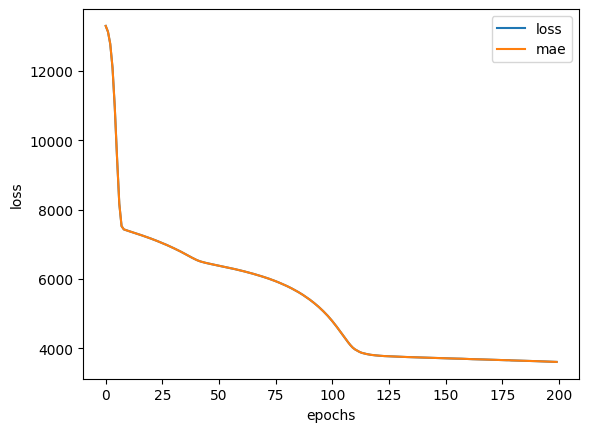

In [87]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If we're not sure on which to use, we could try both and see which performs better.

<Axes: ylabel='Frequency'>

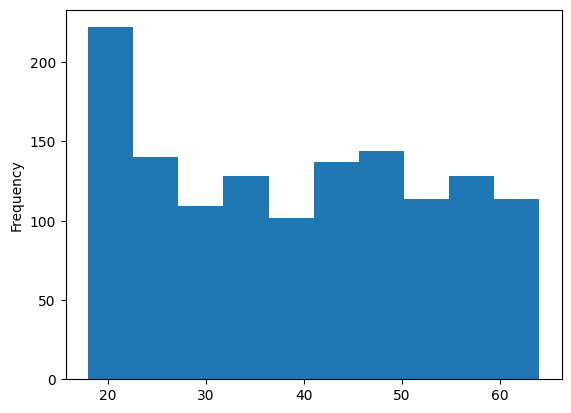

In [88]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

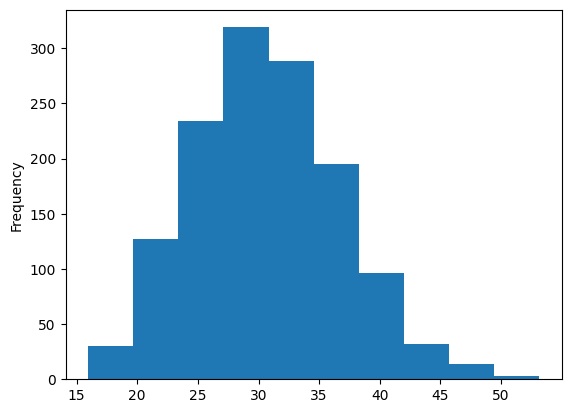

In [89]:
X["bmi"].plot(kind="hist")

In [90]:
  X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

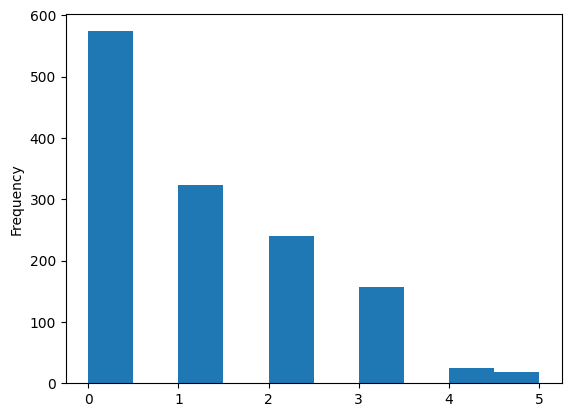

In [91]:
X["children"].plot(kind="hist")

In [92]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])

)

# CreateX & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normalized = ct.transform(X_train)
X_test_normalized = ct.transform(X_test)

In [93]:
# What doe sour data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [94]:
X_train_normalized[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [95]:
X_train.shape, X_train_normalized.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [97]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss="mae",
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normalized, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13297.6787 - mae: 13297.6787
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13290.9492 - mae: 13290.9492
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13273.7236 - mae: 13273.7236
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13235.6025 - mae: 13235.6025
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13165.2910 - mae: 13165.2910
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13051.1631 - mae: 13051.1631
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12882.6553 - mae: 12882.6553
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12649.7354 - mae: 12649.7354
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12342.6289 - mae: 12342.6289
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11953.9102 - mae: 11953.9102
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11490.4092 - mae: 11490.4092
Epoch 12/100
34/34 ━━━━━━━━━━━

In [98]:
# Evaluate our insuracne model traind on normalized data
insurance_model_4.evaluate(X_test_normalized, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3514.0952 - mae: 3514.0952 


[3428.593994140625, 3428.593994140625]